# Lead Scoring Case Study

In [378]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

# Read and understand the data

In [379]:
# Reading an csv file
leads = pd.read_csv('Leads.csv')
leads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [380]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [381]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [382]:
# Check the summary of the dataset

leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [383]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning and Preparation

In [384]:
#Check the number of missing values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [385]:
# Checking percentage of missing/null values :-

round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [386]:
# Dropping Columns having missing values more than 30%

for col in leads.columns:
    if 100*(leads[col].isnull().sum()/len(leads)) > 30:
        leads.drop(col, 1, inplace=True)

In [387]:
# Checking percentage of missing/null values after dropping:-

round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [388]:
# Drop some of unused columns from the dataset like : city ,country:

leads.drop(['City'], axis = 1, inplace = True)
leads.drop(['Country'], axis = 1, inplace = True)

In [389]:
# Checking for duplicates and dropping the entire duplicate row if any:

leads.drop_duplicates(subset=None, inplace=True)

In [390]:
# Checking shape after dropping duplicates:
leads.shape

(9240, 29)

In [391]:
# Funtion to get value_counts for column:
def get_val_cnts(c,df):
    return df[c].value_counts()

In [392]:
# Get the value counts of all the columns
for column in leads:
    print(get_val_cnts(column,leads))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

#### The columns ['Specialization','How did you hear about X Education','Lead Profile'] having 'Select' level.
#### Which means the customer had not selected option while filling form.
#### So it is better to impute will 'Null' values or delete it, let's check it:

In [393]:
#Specialization
get_val_cnts('Specialization',leads)

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [394]:
#How did you hear about X Education
get_val_cnts('How did you hear about X Education',leads)

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [395]:
#Lead Profile
get_val_cnts('Lead Profile',leads)

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

We found the levels 'Lead Profile' and 'How did you hear about X Education' have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

In [396]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also we noticed that there were a few columns in which only one value was present for all. 
These include 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'. 
All of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [397]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [398]:
#What matters most to you in choosing a course
get_val_cnts('What matters most to you in choosing a course',leads)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We found the value 'Better Career Prospects' have 6528 times while the other two levels appear once twice and once respectively. 
So we should drop this column as well.

In [399]:
# Drop the column 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [400]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The column 'What is your current occupation' has a lot of null values. 
So let's just drop the null rows for this column.

In [401]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [402]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [403]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [404]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [405]:
# Check the null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [406]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [407]:
# Check the null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [408]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [409]:
# Check the null values again

leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [410]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


The variables 'Prospect ID' and 'Lead Number' won't be use ,so we will drop it.

In [411]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [412]:
# Let's look at the dataset again

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# Exploratory Data Analysis(EDA)

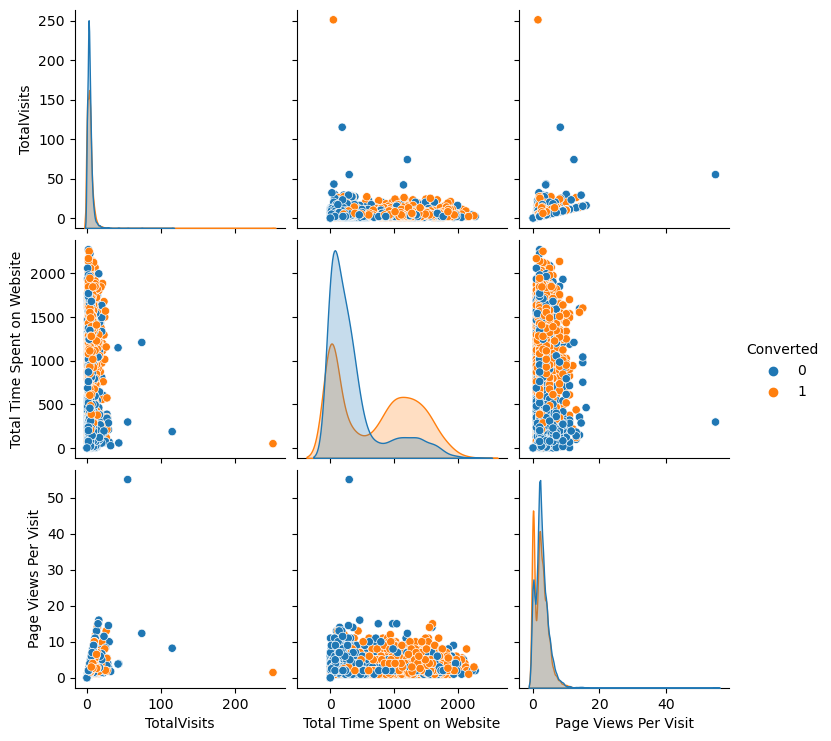

In [413]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,hue='Converted')
plt.show()

### Univariate Analysis

Calculating conversion rate for our Target variable "Converted" which indicates whether a lead has been successfully converted or not.

In [414]:
#Calculating conversion rate:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

48.093519535540565

In [415]:
#Checking value count of target variable 'Converted':
get_val_cnts('Converted',leads)

0    3308
1    3065
Name: Converted, dtype: int64

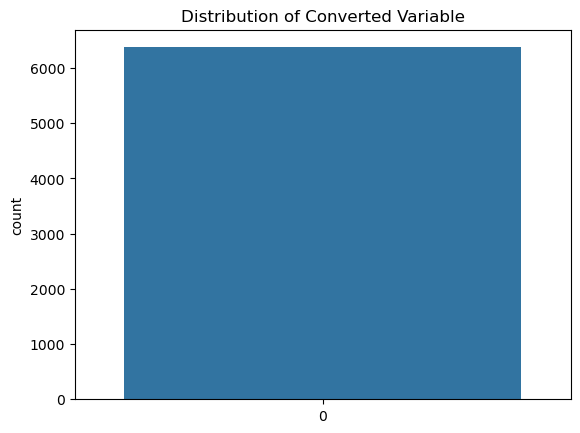

In [416]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

sns.countplot(leads.Converted)
plt.title("Distribution of Converted Variable")
plt.show()

In [417]:
#Checking ratio of imbalance:-

(leads.Converted==1).sum()/(leads.Converted==0).sum()

0.9265417170495768

In [418]:
# Checking data types of remaining columns:-

leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [419]:
# let’s make a list of most important categorical columns into some groups and plot boxplots.
catg_cols_01=['Lead Origin','Lead Source','Do Not Email','What is your current occupation','A free copy of Mastering The Interview']

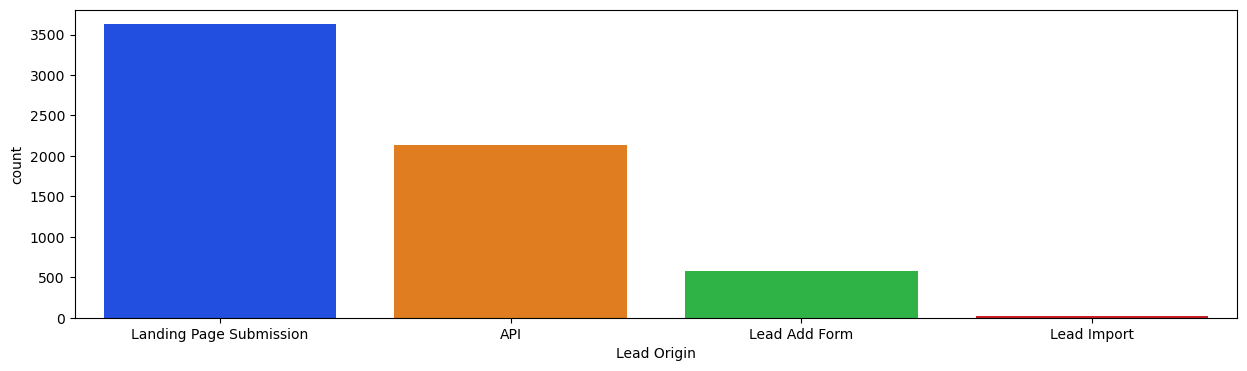

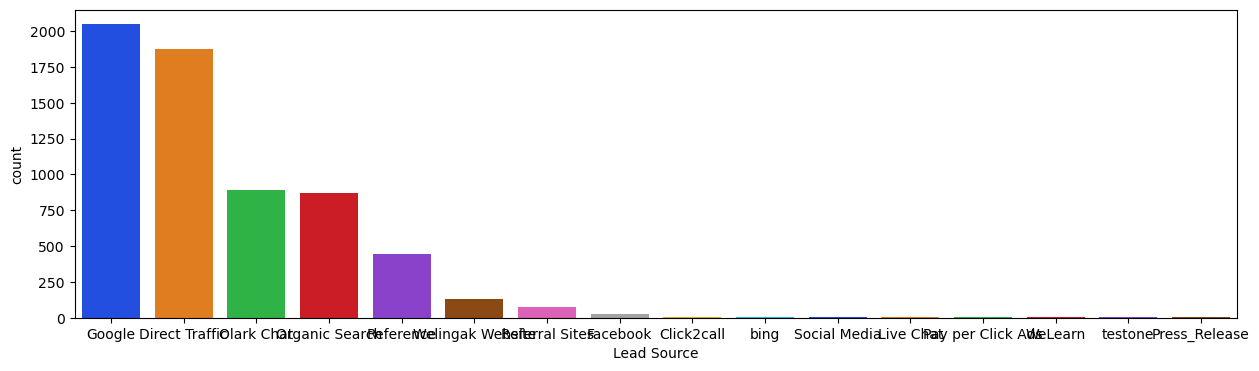

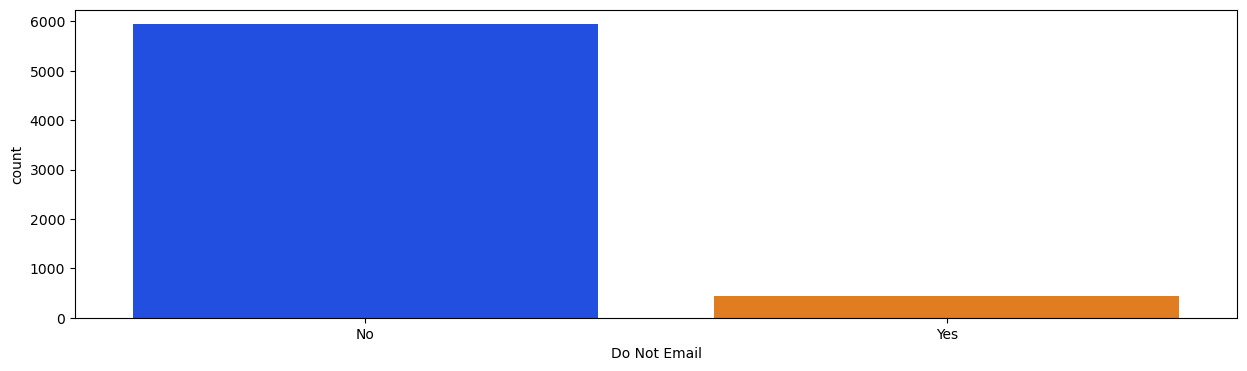

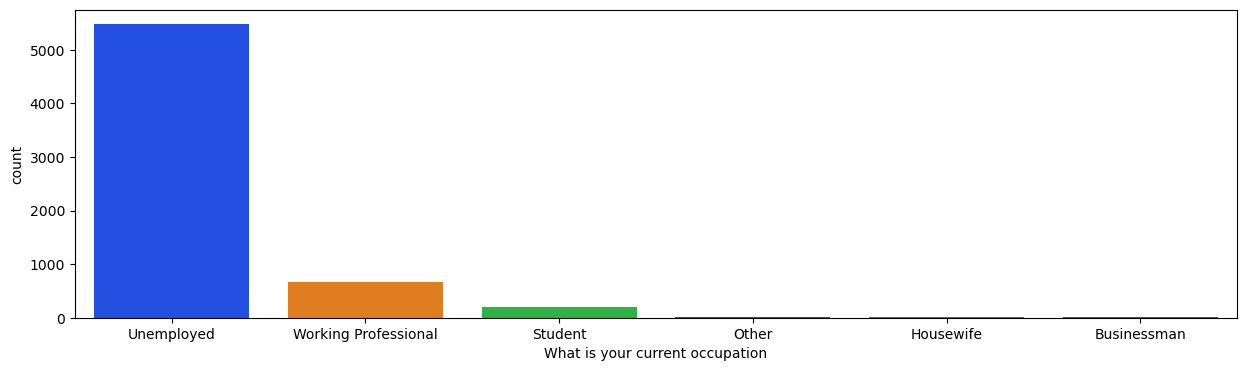

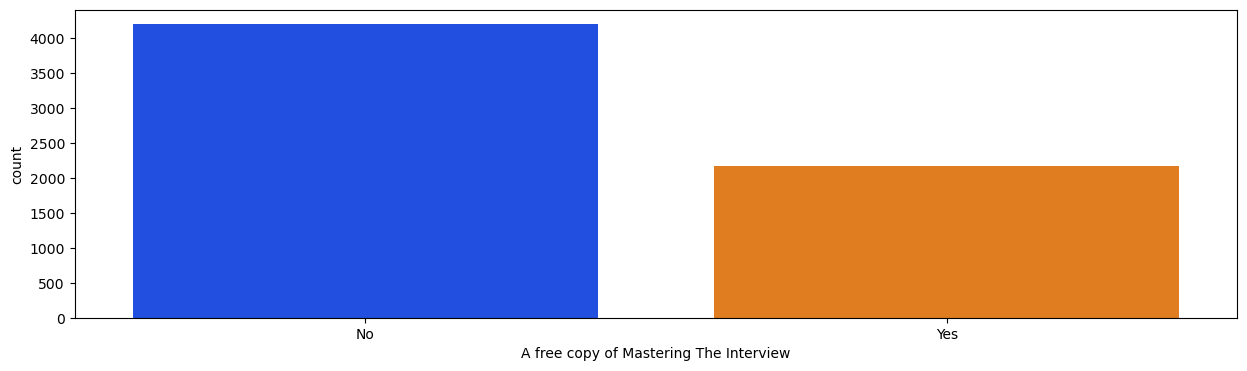

In [420]:
#**Boxplots distribution for the First list of Categorical columns :**
for col in catg_cols_01:
    plt.figure(figsize = (15, 4))
    sns.countplot(data =leads,x=leads[col],order=leads[col].value_counts().index,
    hue =None,palette='bright')
    plt.show()

In [421]:
# So let’s make a list of most important numeric columns into some groups and plot boxplots:
numeric_cols_01=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']

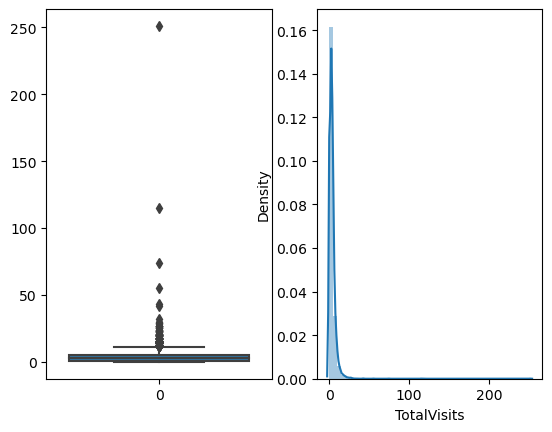

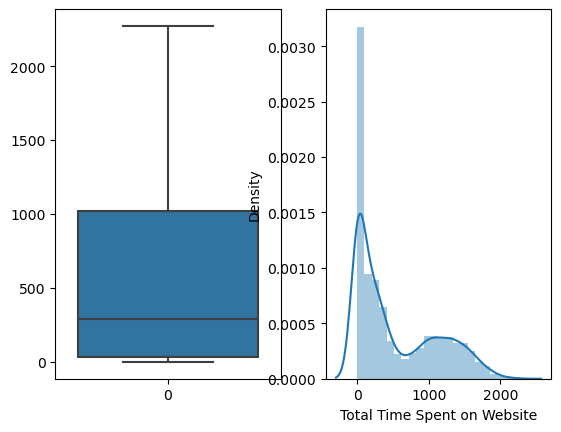

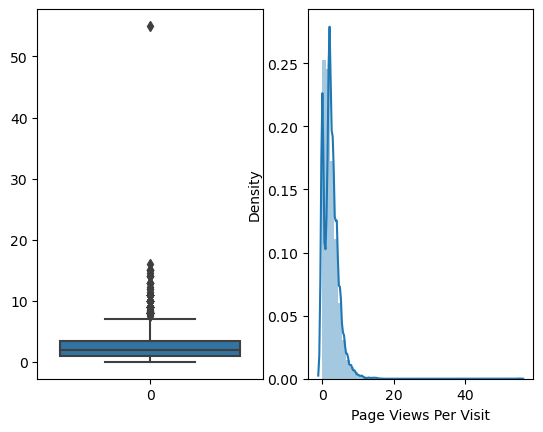

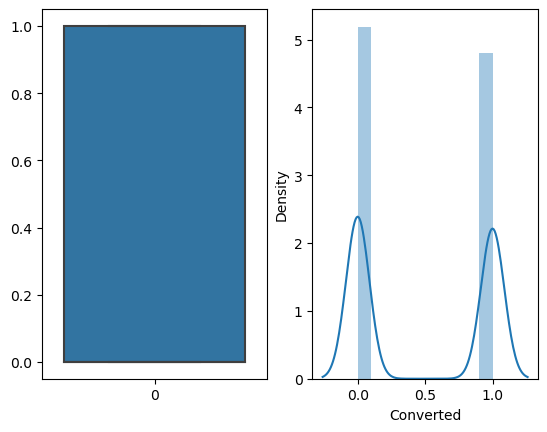

In [422]:
#**Boxplots & distplot distribution for the first list of numeric columns :**
for col in numeric_cols_01:
    f, axes = plt.subplots(1, 2)
    sns.boxplot(leads[col],  orient='v' , ax=axes[0])  
    sns.distplot(leads[col] , ax=axes[1])    
    plt.show()    


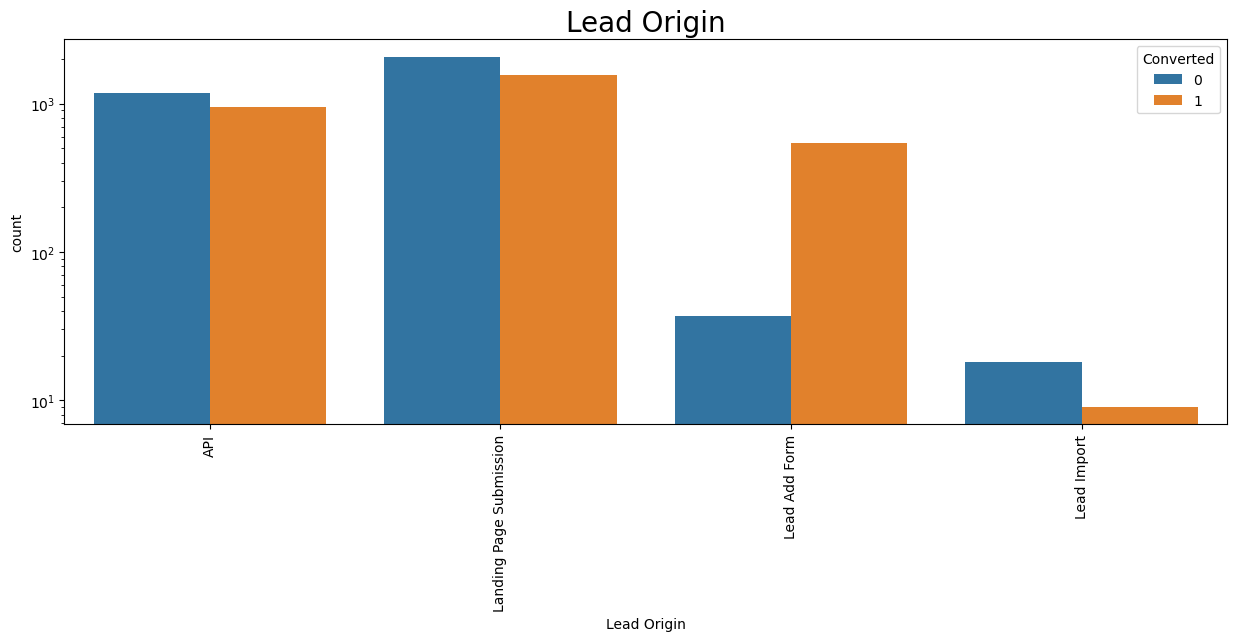

In [423]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1 :-

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')

plt.show()

##### Inferences

We found the following:

- Conversion rate for 'API' is close to 'Landing Page Submission'.
- Conversion rate for 'Lead Add Form' number of conversion is more than other.
- So, to improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form and Lead Important.

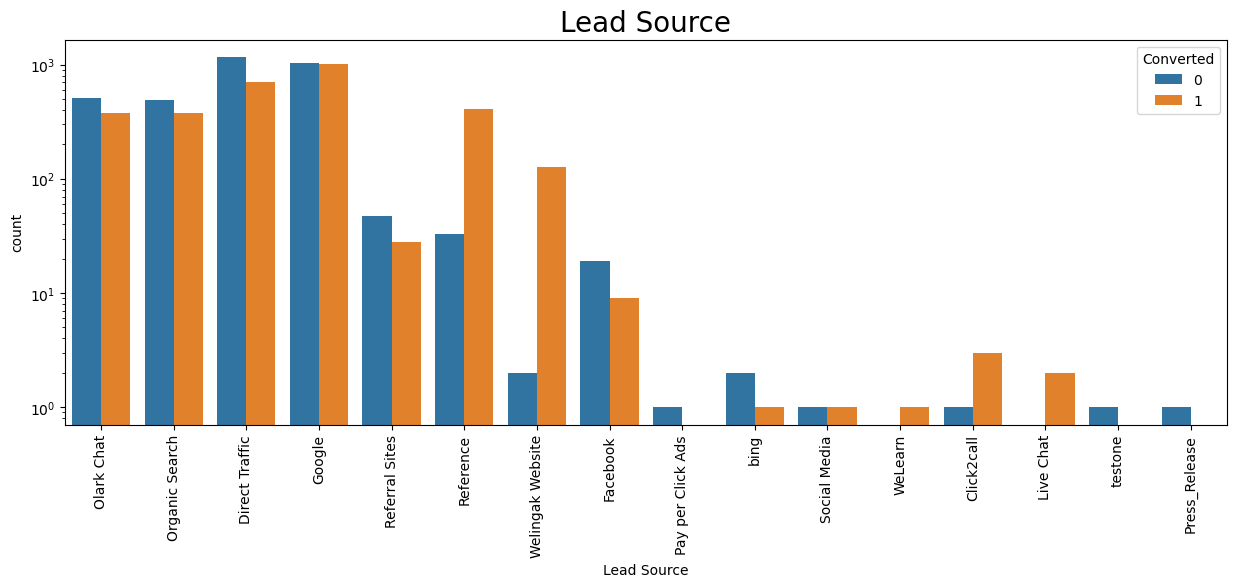

In [424]:
# Plotting count plot of 'Lead Source' for both 'Converted' 0 and 1 :-

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = leads)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)
ax.set_yscale('log')

plt.show()

##### Inferences

We found the following:

- Google and Direct traffic generates maximum number of leads.
- Conversion rate of 'Reference' and 'Welingak Website' leads is high.

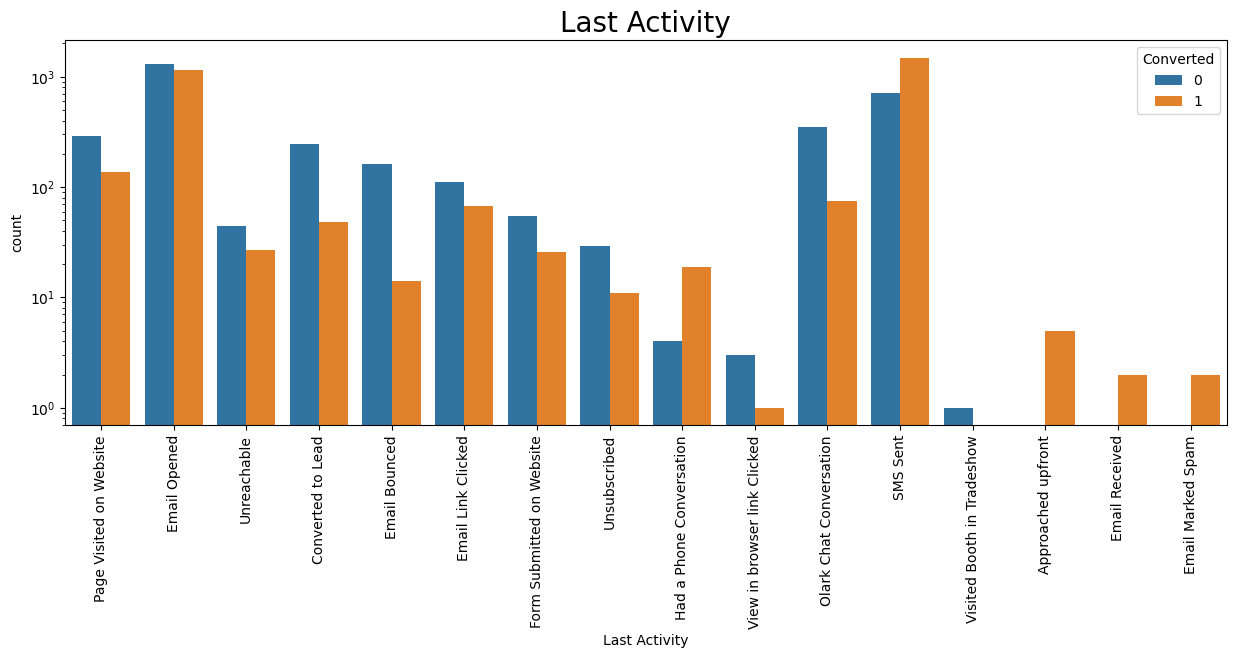

In [425]:
# Plotting count plot of 'Last Activity' for both 'Converted' 0 and 1 :-

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = leads)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)
ax.set_yscale('log')

plt.show()

##### Inferences

- 'Email Opened' hase the highest last activity of leads.
- 'SMS Sent' has the second high of conversion rate for last activity.


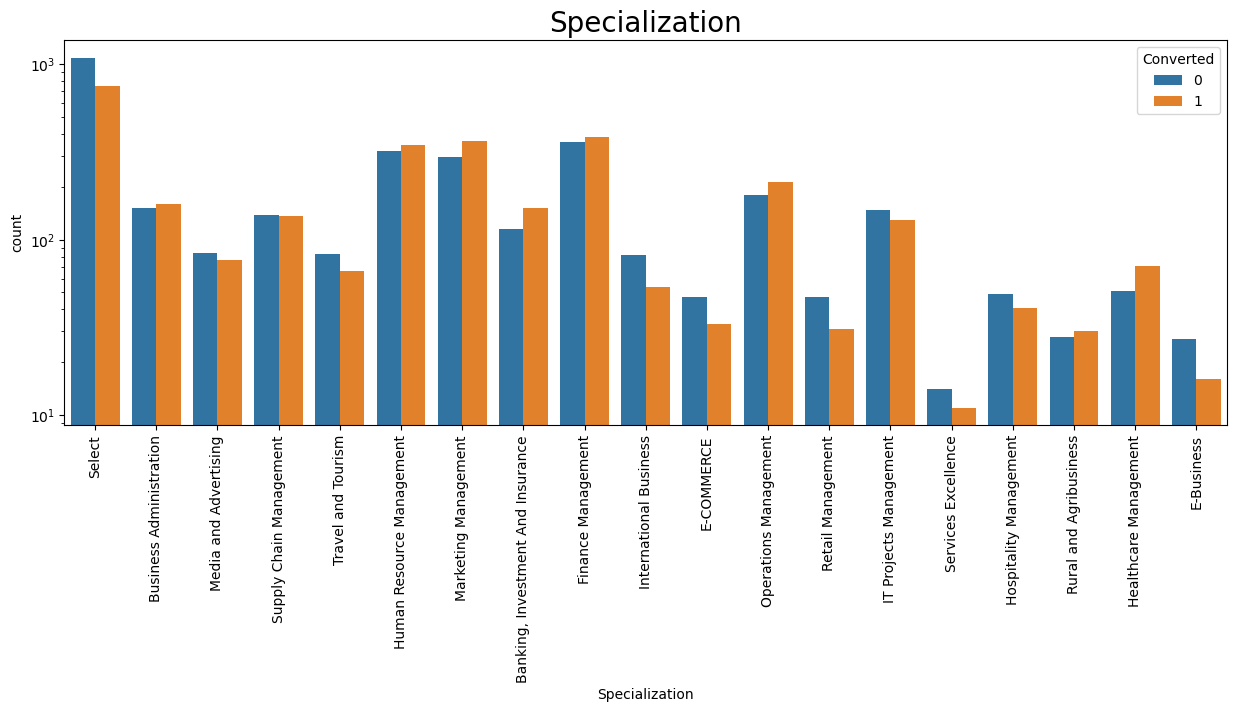

In [426]:
# Plotting count plot of 'Specialization' for both 'Converted' 0 and 1 :-

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = leads)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)
ax.set_yscale('log')

plt.show()

##### Inferences

- The count plot of 'Specialization' that 'Management' specialization altogether having more number of leads generating.
- Other category is also generating more number of leads.



# Handling Outliers

**Removing outliers tend to improve our EDA because outliers may give us a very different approach to our analysis.**

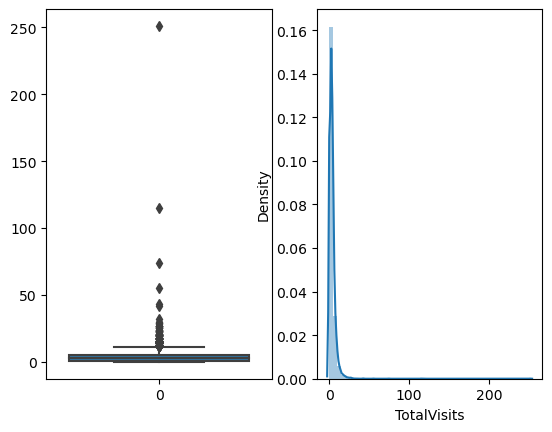

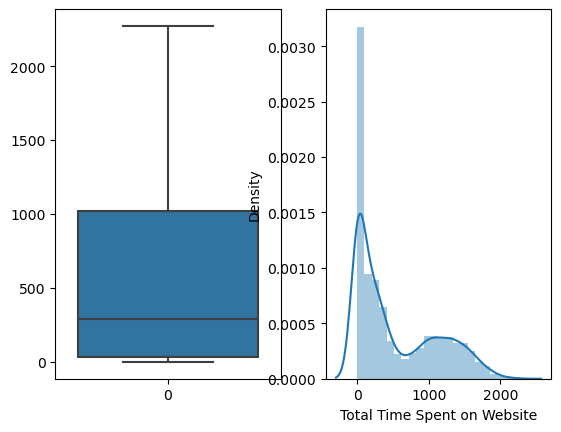

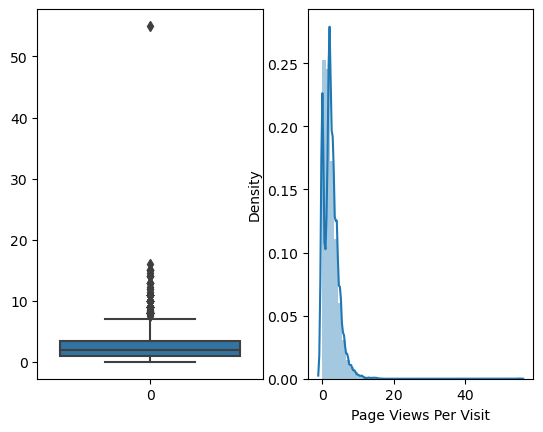

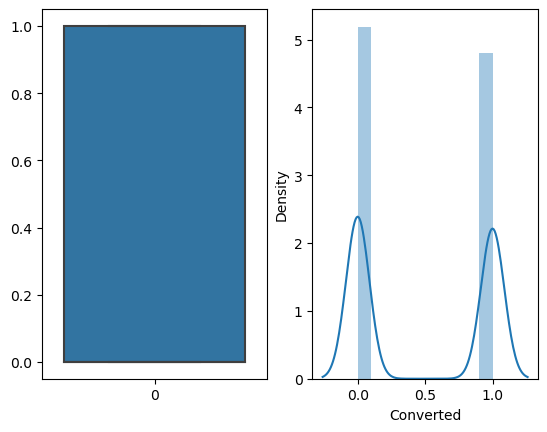

In [427]:
#**Boxplots & distplot distribution for the first list of numeric columns :**
for col in numeric_cols_01:
    f, axes = plt.subplots(1, 2)
    sns.boxplot(leads[col],  orient='v' , ax=axes[0])  
    sns.distplot(leads[col] , ax=axes[1])    
    plt.show()    

We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [428]:
# Treating outliers by capping upper range to 0.99:

Q = leads.TotalVisits.quantile(0.99)

leads = leads[(leads.TotalVisits <= Q)]

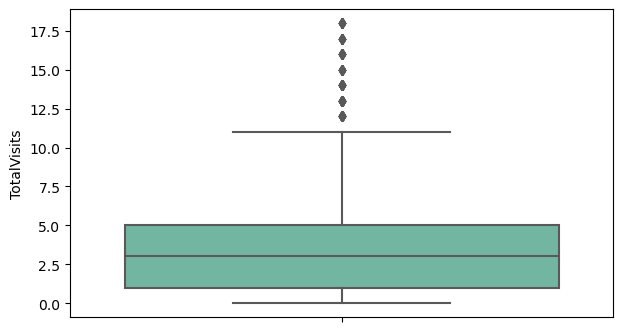

In [429]:
# Verifying outliers after removing it :

plt.figure(figsize = (7,4))
sns.boxplot(y=leads['TotalVisits'],palette='Set2')
plt.show()

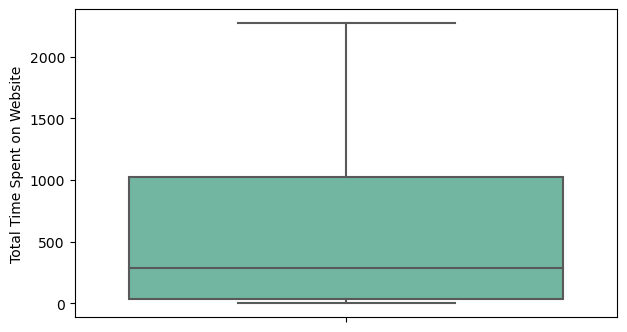

In [430]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website':-

plt.figure(figsize=(7,4))
sns.boxplot(y=leads['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

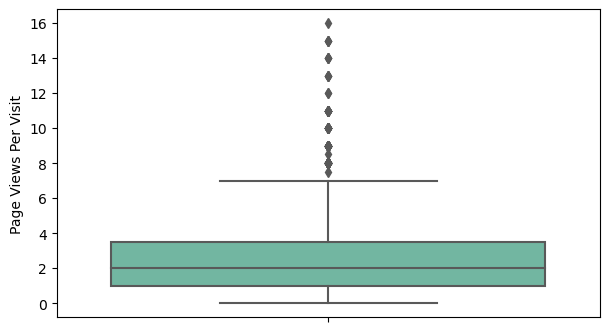

In [431]:
# Plotting box plots to visualize data distribution of 'Page Views Per Visit':

plt.figure(figsize=(7,4))
sns.boxplot(y=leads['Page Views Per Visit'],orient='v',palette='Set2')
plt.show()

We can see from above box plot that only upper range outliers are present in data, so need to lower range treat outliers.

In [432]:
# Treating upper range outliers by capping upper range to 0.99:

Q = leads['Page Views Per Visit'].quantile(0.99)

leads = leads[(leads['Page Views Per Visit'] <= Q)]

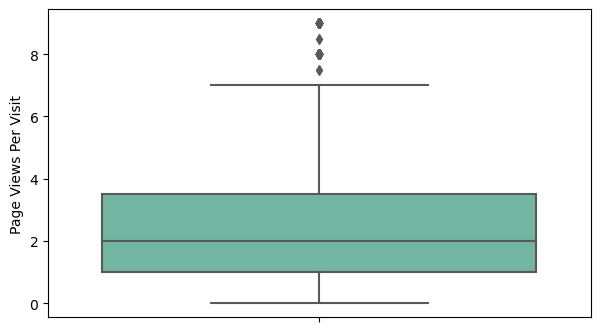

In [433]:
# Verifying outliers after removing it :

plt.figure(figsize = (7,4))
sns.boxplot(y=leads['Page Views Per Visit'],palette='Set2')
plt.show()

# Bivariate Analysis

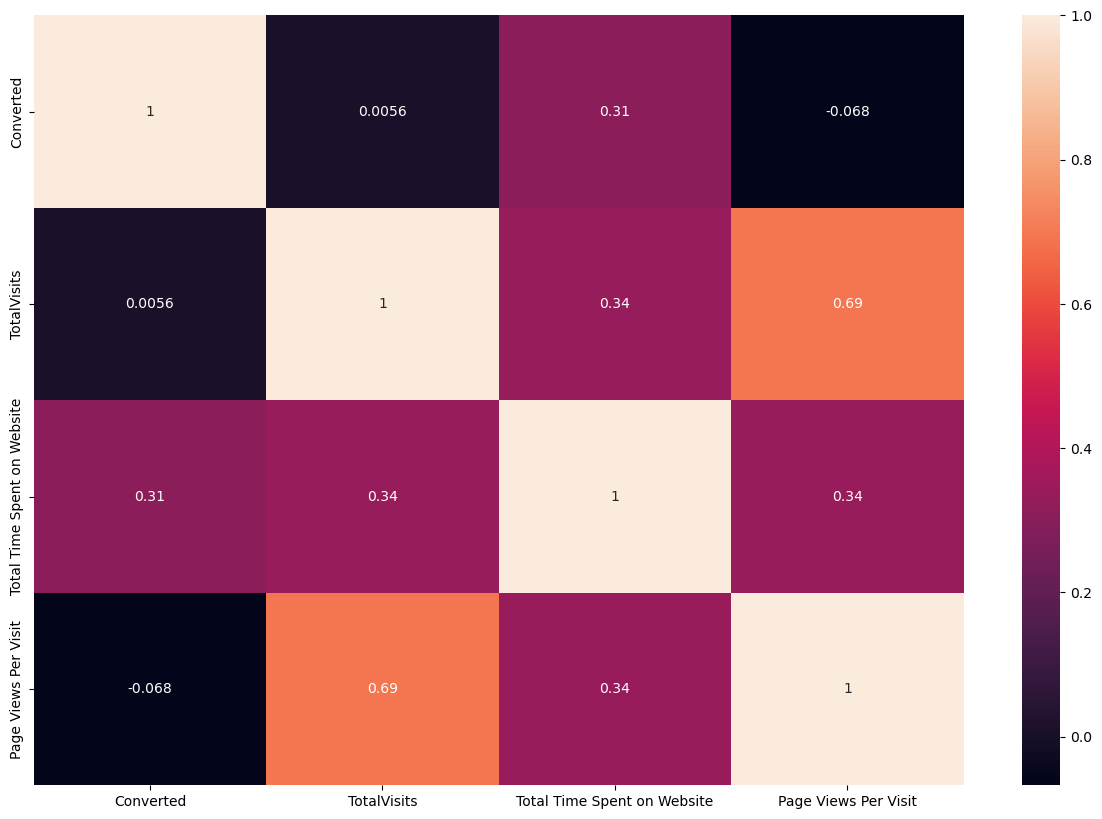

In [434]:
# Heatmap to understand the attributes correlation:-

plt.figure(figsize = (15,10))        
ax = sns.heatmap(leads.corr(),annot = True)

# Observation
'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72.

'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

# Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. 

In [435]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [436]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [437]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [438]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

# Test-Train Split

The next step is to split the dataset into training an testing sets.

In [439]:
# Import the required library

from sklearn.model_selection import train_test_split

In [440]:
# Put all the feature variables in X

X = leads.drop(['Converted'], 1)
X.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [441]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [442]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling

There are a few numeric variables present in the dataset which have different scales. 

So let's go ahead and scale these variables.

In [443]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [444]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1493,0.277778,0.155370,0.555556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6039,0.388889,0.002201,0.777778,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3226,0.111111,0.080546,0.222222,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4863,0.333333,0.615757,0.666667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9172,0.111111,0.475792,0.222222,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


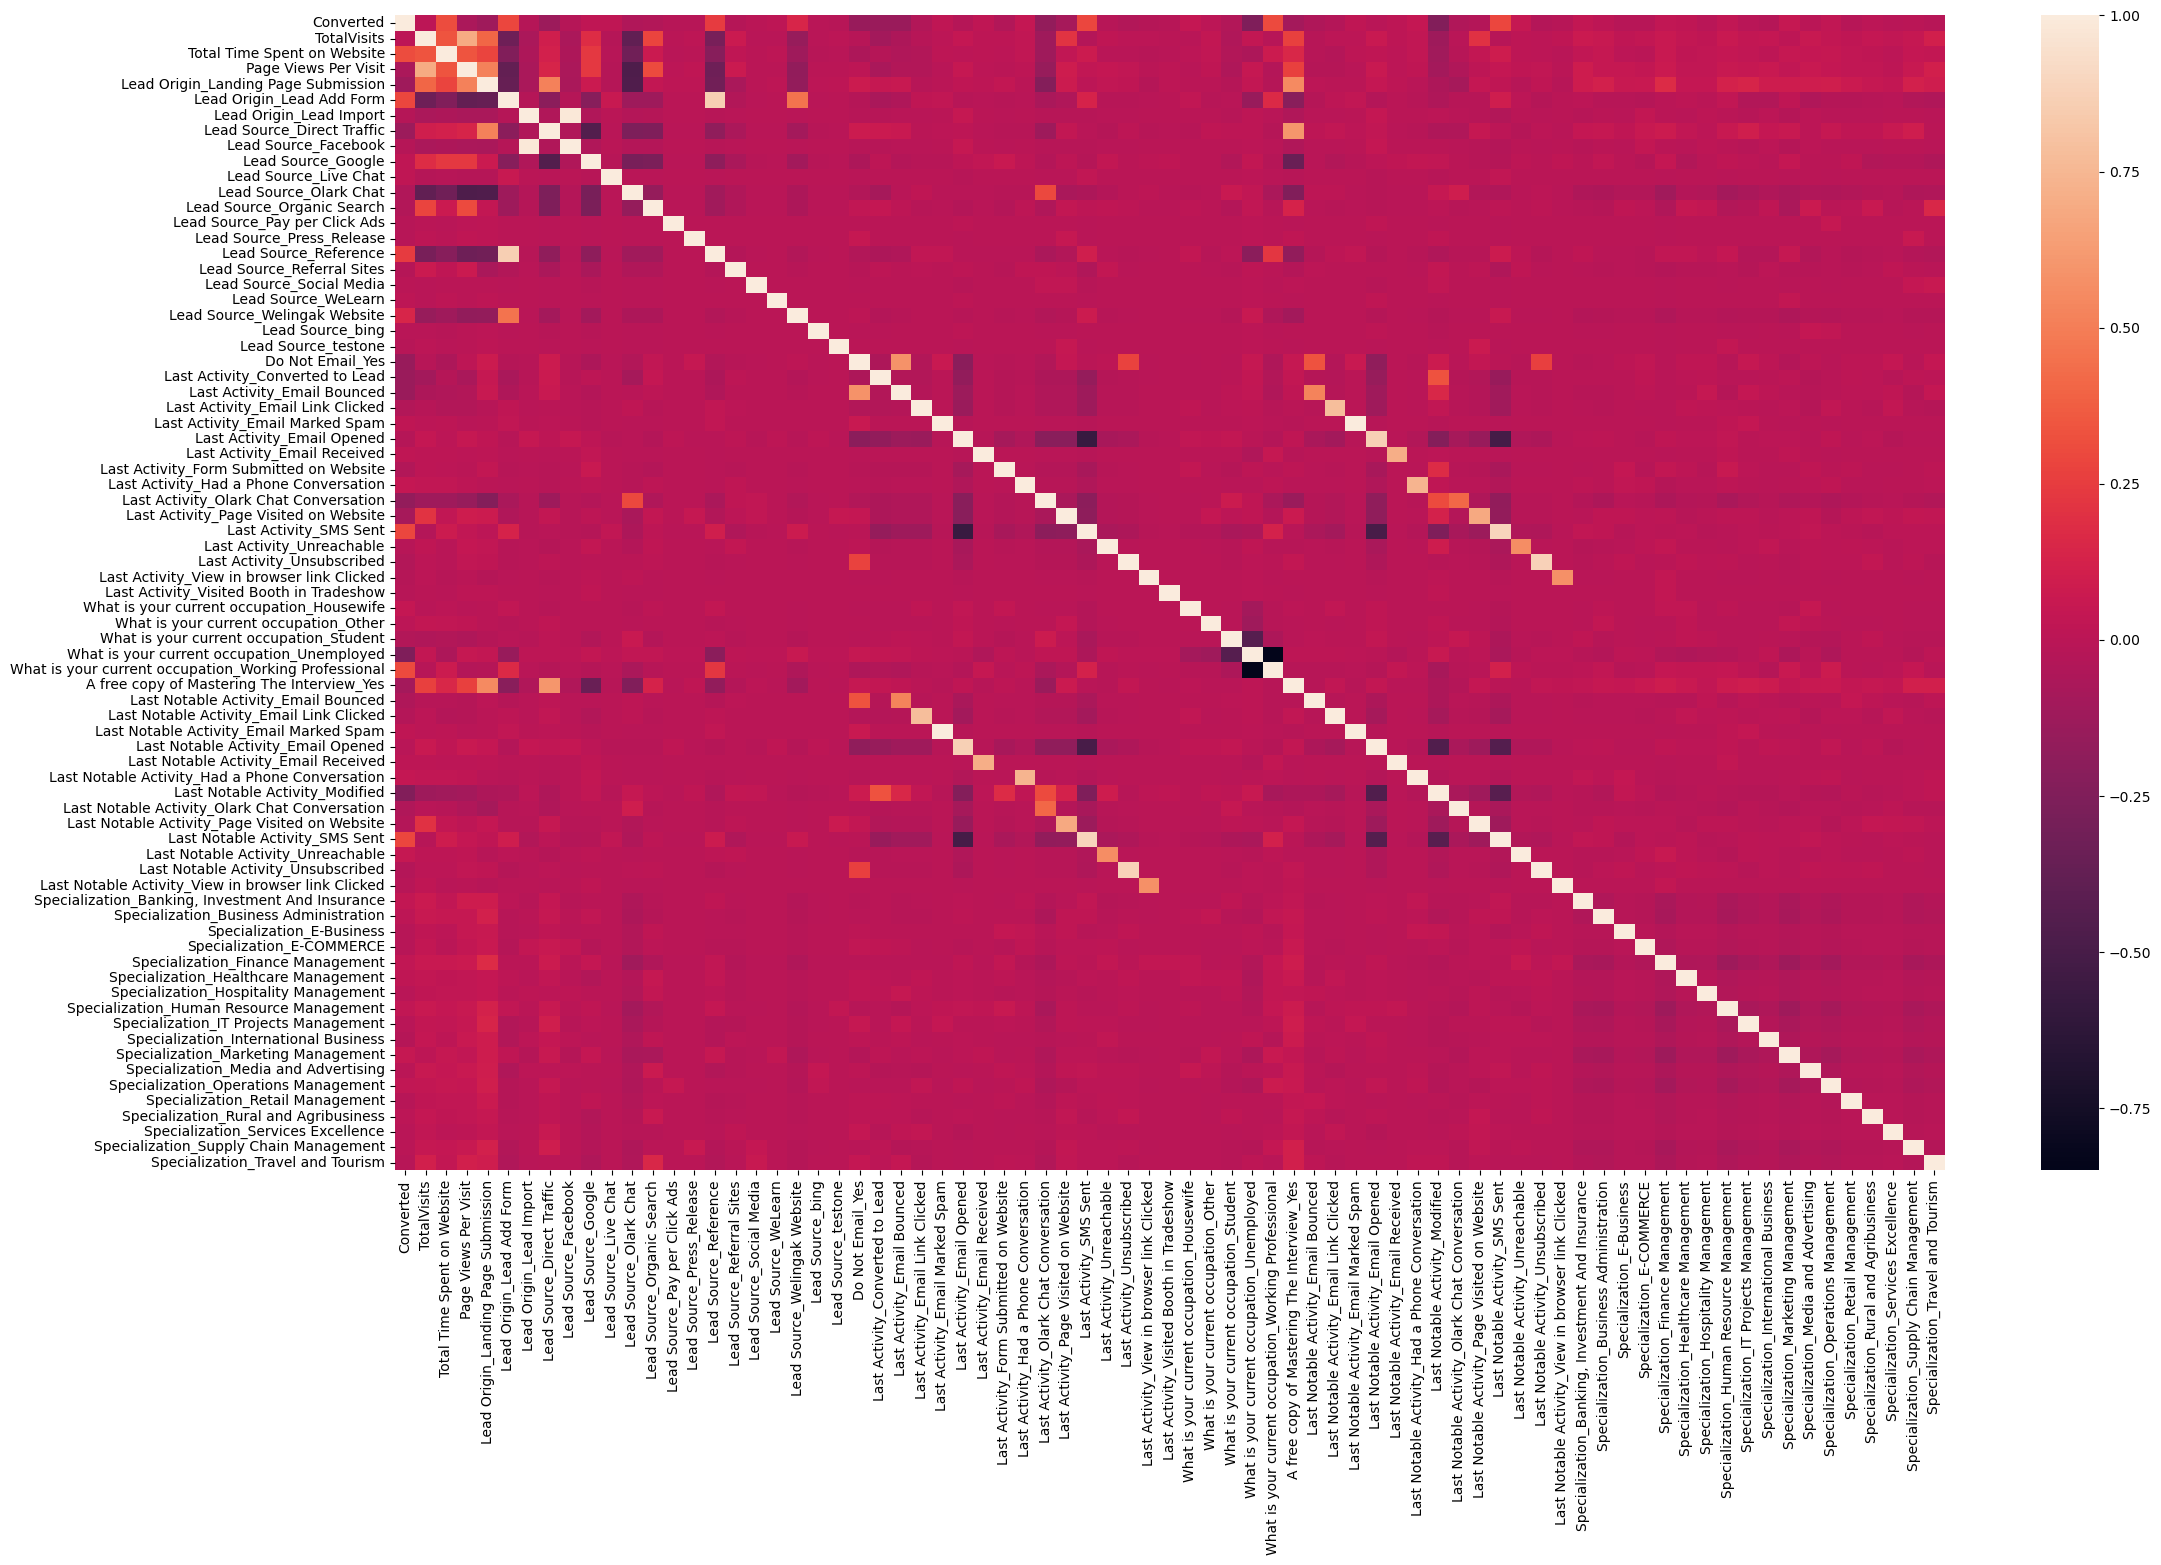

In [445]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

# Model Building

You can see that there are a lot of variables present in the dataset which we cannot deal with. 

So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [446]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [447]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step =15)
# running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [448]:
# Take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 3),
 ('Lead Source_testone', False, 4),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),


In [449]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

We have all the variables selected by RFE and since we care about the statistics part like the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.



In [450]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [451]:
# Import statsmodels

import statsmodels.api as sm

In [452]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4354
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.4
Date:                Mon, 20 Nov 2023   Deviance:                       3904.7
Time:                        20:28:44   Pearson chi2:                 4.54e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4446      0.643     -0.691      0.490      -1.706       0.816
TotalVisits                                              1.5560      0.347      4.483      0.000       0.876       2.236
Total Time Spent on Website                              4.0605      0.184     22.066      0.000       3.700       4.421
Page Views Per Visit                                    -1.6905      0.293     -5.779      0.000      -2.264      -1.117
Lead Origin_Landing Page Submission                     -0.9835      0.133     -7.422      0.000      -1.243      -0.724
Lead Origin_Lead Add Form                                2.2311      0.225      9.927      0.000       1.791       2.672
Lead Source_Direct Traffic                              -0.4377      0.107     -4.106      0.000      -0.647      -0.229
Lead Source_Organic Search                              -0.3525      0.132     -2.666      0.008      -0.612      -0.093
Lead Source_Referral Sites                              -0.4610      0.391     -1.179      0.239      -1.228       0.306
Lead Source_Welingak Website                             3.0012      1.033      2.906      0.004       0.977       5.025
Do Not Email_Yes                                        -1.1620      0.223     -5.200      0.000      -1.600      -0.724
Last Activity_Converted to Lead                         -0.7028      0.240     -2.922      0.003      -1.174      -0.231
Last Activity_Email Bounced                             -0.6902      0.453     -1.525      0.127      -1.577       0.197
Last Activity_Had a Phone Conversation                   2.3049      0.950      2.427      0.015       0.444       4.166
Last Activity_Olark Chat Conversation                   -0.6871      0.227     -3.022      0.003      -1.133      -0.241
Last Activity_Page Visited on Website                   -0.6326      0.186     -3.400      0.001      -0.997      -0.268
Last Activity_SMS Sent                                   1.0366      0.091     11.445      0.000       0.859       1.214
What is your current occupation_Housewife               20.9759   1.14e+04      0.002      0.999   -2.23e+04    2.23e+04
What is your current occupation_Student                 -0.5863      0.674     -0.870      0.384      -1.907       0.734
What is your current occupation_Unemployed              -0.5212      0.635     -0.821      0.412      -1.766       0.723
What is your current occupation_Working Professional     1.9461      0.663      2.936      0.003       0.647       3.245
Last Notable Activity_Email Link Clicked                -0.5409      0.294     -1.839      0.066      -1.117       0.036
Last Notable Activity_Modified                          -0

There are quite a few variable which have a p-value greater than 0.05. 

We will need to take care of them. But first, let's also look at the VIFs.

In [453]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [454]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,6.42
2,Page Views Per Visit,6.38
3,Lead Origin_Landing Page Submission,6.07
0,TotalVisits,4.87
1,Total Time Spent on Website,2.32
5,Lead Source_Direct Traffic,2.24
21,Last Notable Activity_Modified,2.23
4,Lead Origin_Lead Add Form,2.01
19,What is your current occupation_Working Profes...,1.96
15,Last Activity_SMS Sent,1.92


VIFs seem to be in a decent range except some variables which have a high p-value as well as a high VIF.

Let's first drop the variable 'What is your current occupation_Unemployed' since it has a high p-value as well as a high VIF.

In [455]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [456]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4355
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1952.7
Date:                Mon, 20 Nov 2023   Deviance:                       3905.4
Time:                        20:28:44   Pearson chi2:                 4.54e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3903
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9660      0.101     -9.540      0.000      -1.164      -0.768
TotalVisits                                              1.5752      0.346      4.547      0.000       0.896       2.254
Total Time Spent on Website                              4.0631      0.184     22.086      0.000       3.702       4.424
Page Views Per Visit                                    -1.6940      0.293     -5.790      0.000      -2.267      -1.121
Lead Origin_Landing Page Submission                     -0.9902      0.132     -7.486      0.000      -1.249      -0.731
Lead Origin_Lead Add Form                                2.2297      0.225      9.921      0.000       1.789       2.670
Lead Source_Direct Traffic                              -0.4343      0.106     -4.079      0.000      -0.643      -0.226
Lead Source_Organic Search                              -0.3547      0.132     -2.682      0.007      -0.614      -0.095
Lead Source_Referral Sites                              -0.4655      0.391     -1.190      0.234      -1.232       0.301
Lead Source_Welingak Website                             3.0031      1.033      2.908      0.004       0.979       5.027
Do Not Email_Yes                                        -1.1605      0.224     -5.192      0.000      -1.599      -0.722
Last Activity_Converted to Lead                         -0.7044      0.240     -2.929      0.003      -1.176      -0.233
Last Activity_Email Bounced                             -0.6925      0.453     -1.530      0.126      -1.580       0.195
Last Activity_Had a Phone Conversation                   2.3027      0.949      2.426      0.015       0.442       4.163
Last Activity_Olark Chat Conversation                   -0.6817      0.227     -3.003      0.003      -1.127      -0.237
Last Activity_Page Visited on Website                   -0.6279      0.186     -3.375      0.001      -0.993      -0.263
Last Activity_SMS Sent                                   1.0348      0.091     11.430      0.000       0.857       1.212
What is your current occupation_Housewife               21.5003   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_Student                 -0.0676      0.233     -0.290      0.772      -0.524       0.389
What is your current occupation_Working Professional     2.4654      0.198     12.466      0.000       2.078       2.853
Last Notable Activity_Email Link Clicked                -0.5442      0.294     -1.850      0.064      -1.121       0.032
Last Notable Activity_Modified                          -0.6909      0.107     -6.464      0.000      -0.900      -0.481
Last Notable Activity_Olark Chat Conversation           -0

Let's drop the variable `What is your current occupation_Housewife` 
since it has a high p-value as well as a high VIF.

In [457]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [458]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.09
3,Lead Origin_Landing Page Submission,6.03
0,TotalVisits,4.82
1,Total Time Spent on Website,2.23
5,Lead Source_Direct Traffic,2.21
19,Last Notable Activity_Modified,2.08
4,Lead Origin_Lead Add Form,1.79
11,Last Activity_Email Bounced,1.71
9,Do Not Email_Yes,1.70
26,Specialization_Finance Management,1.68


Drop the ones with VIFs are more than 5 'Page Views Per Visit'.

In [459]:

X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [460]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4357
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1973.1
Date:                Mon, 20 Nov 2023   Deviance:                       3946.1
Time:                        20:28:45   Pearson chi2:                 4.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0857      0.099    -10.914      0.000      -1.281      -0.891
TotalVisits                                              0.5004      0.289      1.732      0.083      -0.066       1.067
Total Time Spent on Website                              3.9591      0.181     21.835      0.000       3.604       4.314
Lead Origin_Landing Page Submission                     -1.1804      0.127     -9.265      0.000      -1.430      -0.931
Lead Origin_Lead Add Form                                2.3738      0.224     10.610      0.000       1.935       2.812
Lead Source_Direct Traffic                              -0.4019      0.105     -3.818      0.000      -0.608      -0.196
Lead Source_Organic Search                              -0.4527      0.129     -3.514      0.000      -0.705      -0.200
Lead Source_Referral Sites                              -0.6643      0.386     -1.719      0.086      -1.422       0.093
Lead Source_Welingak Website                             2.9828      1.032      2.890      0.004       0.960       5.006
Do Not Email_Yes                                        -1.1990      0.223     -5.386      0.000      -1.635      -0.763
Last Activity_Converted to Lead                         -0.6173      0.240     -2.576      0.010      -1.087      -0.148
Last Activity_Email Bounced                             -0.5492      0.447     -1.228      0.220      -1.426       0.328
Last Activity_Had a Phone Conversation                   2.3090      0.946      2.440      0.015       0.455       4.163
Last Activity_Olark Chat Conversation                   -0.6088      0.226     -2.690      0.007      -1.052      -0.165
Last Activity_Page Visited on Website                   -0.5167      0.182     -2.837      0.005      -0.874      -0.160
Last Activity_SMS Sent                                   1.0149      0.090     11.284      0.000       0.839       1.191
What is your current occupation_Student                 -0.0530      0.234     -0.227      0.821      -0.512       0.406
What is your current occupation_Working Professional     2.4575      0.197     12.475      0.000       2.071       2.844
Last Notable Activity_Email Link Clicked                -0.4912      0.290     -1.693      0.090      -1.060       0.077
Last Notable Activity_Modified                          -0.7137      0.107     -6.700      0.000      -0.922      -0.505
Last Notable Activity_Olark Chat Conversation           -0.6200      0.457     -1.356      0.175      -1.516       0.276
Last Notable Activity_Unreachable                        2.1649      0.817      2.649      0.008       0.563       3.766
Specialization_Banking, Investment And Insurance         0

Let's drop the variable `Lead Source_Referral Sites` 
since it has a high p-value as well as a high VIF.

In [461]:
X_train.drop('Lead Source_Referral Sites', axis = 1, inplace = True)

In [462]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4358
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1974.6
Date:                Mon, 20 Nov 2023   Deviance:                       3949.2
Time:                        20:28:45   Pearson chi2:                 4.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0992      0.099    -11.076      0.000      -1.294      -0.905
TotalVisits                                              0.4424      0.286      1.545      0.122      -0.119       1.004
Total Time Spent on Website                              3.9536      0.181     21.827      0.000       3.599       4.309
Lead Origin_Landing Page Submission                     -1.1641      0.127     -9.175      0.000      -1.413      -0.915
Lead Origin_Lead Add Form                                2.3848      0.224     10.663      0.000       1.946       2.823
Lead Source_Direct Traffic                              -0.3950      0.105     -3.754      0.000      -0.601      -0.189
Lead Source_Organic Search                              -0.4318      0.128     -3.367      0.001      -0.683      -0.180
Lead Source_Welingak Website                             2.9847      1.032      2.892      0.004       0.962       5.008
Do Not Email_Yes                                        -1.1966      0.223     -5.376      0.000      -1.633      -0.760
Last Activity_Converted to Lead                         -0.6198      0.239     -2.588      0.010      -1.089      -0.150
Last Activity_Email Bounced                             -0.5583      0.447     -1.248      0.212      -1.435       0.318
Last Activity_Had a Phone Conversation                   2.2908      0.952      2.405      0.016       0.424       4.157
Last Activity_Olark Chat Conversation                   -0.6028      0.226     -2.663      0.008      -1.047      -0.159
Last Activity_Page Visited on Website                   -0.5038      0.182     -2.771      0.006      -0.860      -0.147
Last Activity_SMS Sent                                   1.0202      0.090     11.352      0.000       0.844       1.196
What is your current occupation_Student                 -0.0454      0.234     -0.194      0.846      -0.504       0.414
What is your current occupation_Working Professional     2.4532      0.197     12.453      0.000       2.067       2.839
Last Notable Activity_Email Link Clicked                -0.4834      0.290     -1.667      0.096      -1.052       0.085
Last Notable Activity_Modified                          -0.7238      0.106     -6.810      0.000      -0.932      -0.515
Last Notable Activity_Olark Chat Conversation           -0.6282      0.457     -1.375      0.169      -1.524       0.267
Last Notable Activity_Unreachable                        2.1694      0.816      2.658      0.008       0.569       3.769
Specialization_Banking, Investment And Insurance         0.9655      0.221      4.378      0.000       0.533       1.398
Specialization_Business Administration                   0

Let's drop the variable 'Last Notable Activity_Olark Chat Conversation' since it has a high p-value as well as a high VIF.

In [463]:
X_train.drop('Last Notable Activity_Olark Chat Conversation', axis = 1, inplace = True)

In [464]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4359
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1975.6
Date:                Mon, 20 Nov 2023   Deviance:                       3951.2
Time:                        20:28:45   Pearson chi2:                 4.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1029      0.099    -11.122      0.000      -1.297      -0.909
TotalVisits                                              0.4334      0.286      1.515      0.130      -0.127       0.994
Total Time Spent on Website                              3.9419      0.181     21.809      0.000       3.588       4.296
Lead Origin_Landing Page Submission                     -1.1637      0.127     -9.174      0.000      -1.412      -0.915
Lead Origin_Lead Add Form                                2.3768      0.223     10.637      0.000       1.939       2.815
Lead Source_Direct Traffic                              -0.3920      0.105     -3.729      0.000      -0.598      -0.186
Lead Source_Organic Search                              -0.4301      0.128     -3.357      0.001      -0.681      -0.179
Lead Source_Welingak Website                             2.9886      1.032      2.895      0.004       0.966       5.012
Do Not Email_Yes                                        -1.2016      0.222     -5.405      0.000      -1.637      -0.766
Last Activity_Converted to Lead                         -0.6491      0.238     -2.723      0.006      -1.116      -0.182
Last Activity_Email Bounced                             -0.5657      0.447     -1.267      0.205      -1.441       0.310
Last Activity_Had a Phone Conversation                   2.2742      0.949      2.395      0.017       0.413       4.135
Last Activity_Olark Chat Conversation                   -0.7596      0.201     -3.779      0.000      -1.154      -0.366
Last Activity_Page Visited on Website                   -0.5110      0.181     -2.815      0.005      -0.867      -0.155
Last Activity_SMS Sent                                   1.0215      0.090     11.376      0.000       0.845       1.197
What is your current occupation_Student                 -0.0553      0.234     -0.236      0.813      -0.514       0.403
What is your current occupation_Working Professional     2.4534      0.197     12.453      0.000       2.067       2.840
Last Notable Activity_Email Link Clicked                -0.4764      0.290     -1.644      0.100      -1.044       0.092
Last Notable Activity_Modified                          -0.6886      0.103     -6.692      0.000      -0.890      -0.487
Last Notable Activity_Unreachable                        2.1767      0.816      2.667      0.008       0.577       3.776
Specialization_Banking, Investment And Insurance         0.9690      0.221      4.392      0.000       0.537       1.401
Specialization_Business Administration                   0.7435      0.199      3.727      0.000       0.353       1.134
Specialization_E-Business                                0

Let's drop the variable 'Last Activity_Email Bounced' since it has a high p-value as well as a high VIF.

In [465]:
X_train.drop('Last Activity_Email Bounced', axis = 1, inplace = True)

In [466]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4360
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1976.5
Date:                Mon, 20 Nov 2023   Deviance:                       3952.9
Time:                        20:28:45   Pearson chi2:                 4.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1123      0.099    -11.238      0.000      -1.306      -0.918
TotalVisits                                              0.4487      0.286      1.569      0.117      -0.112       1.009
Total Time Spent on Website                              3.9391      0.181     21.809      0.000       3.585       4.293
Lead Origin_Landing Page Submission                     -1.1689      0.127     -9.221      0.000      -1.417      -0.920
Lead Origin_Lead Add Form                                2.3889      0.224     10.685      0.000       1.951       2.827
Lead Source_Direct Traffic                              -0.3916      0.105     -3.725      0.000      -0.598      -0.186
Lead Source_Organic Search                              -0.4327      0.128     -3.378      0.001      -0.684      -0.182
Lead Source_Welingak Website                             2.9782      1.031      2.889      0.004       0.957       4.999
Do Not Email_Yes                                        -1.3390      0.197     -6.788      0.000      -1.726      -0.952
Last Activity_Converted to Lead                         -0.6266      0.238     -2.636      0.008      -1.092      -0.161
Last Activity_Had a Phone Conversation                   2.3130      0.958      2.413      0.016       0.435       4.191
Last Activity_Olark Chat Conversation                   -0.7401      0.201     -3.690      0.000      -1.133      -0.347
Last Activity_Page Visited on Website                   -0.4928      0.181     -2.719      0.007      -0.848      -0.138
Last Activity_SMS Sent                                   1.0386      0.089     11.679      0.000       0.864       1.213
What is your current occupation_Student                 -0.0613      0.234     -0.262      0.793      -0.520       0.397
What is your current occupation_Working Professional     2.4485      0.197     12.459      0.000       2.063       2.834
Last Notable Activity_Email Link Clicked                -0.4702      0.290     -1.622      0.105      -1.038       0.098
Last Notable Activity_Modified                          -0.7022      0.102     -6.863      0.000      -0.903      -0.502
Last Notable Activity_Unreachable                        2.1821      0.816      2.673      0.008       0.582       3.782
Specialization_Banking, Investment And Insurance         0.9769      0.221      4.426      0.000       0.544       1.409
Specialization_Business Administration                   0.7514      0.200      3.764      0.000       0.360       1.143
Specialization_E-Business                                0.8535      0.501      1.705      0.088      -0.128       1.835
Specialization_E-COMMERCE                                0

Let's drop the variable 'What is your current occupation_Student' since it has a high p-value as well as a high VIF.

In [468]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [469]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4361
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1976.5
Date:                Mon, 20 Nov 2023   Deviance:                       3953.0
Time:                        20:38:00   Pearson chi2:                 4.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3836
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1155      0.098    -11.358      0.000      -1.308      -0.923
TotalVisits                                              0.4522      0.286      1.583      0.113      -0.108       1.012
Total Time Spent on Website                              3.9391      0.181     21.810      0.000       3.585       4.293
Lead Origin_Landing Page Submission                     -1.1682      0.127     -9.217      0.000      -1.417      -0.920
Lead Origin_Lead Add Form                                2.3889      0.224     10.685      0.000       1.951       2.827
Lead Source_Direct Traffic                              -0.3920      0.105     -3.730      0.000      -0.598      -0.186
Lead Source_Organic Search                              -0.4326      0.128     -3.377      0.001      -0.684      -0.182
Lead Source_Welingak Website                             2.9797      1.031      2.890      0.004       0.959       5.001
Do Not Email_Yes                                        -1.3377      0.197     -6.784      0.000      -1.724      -0.951
Last Activity_Converted to Lead                         -0.6261      0.238     -2.635      0.008      -1.092      -0.160
Last Activity_Had a Phone Conversation                   2.3142      0.958      2.415      0.016       0.436       4.192
Last Activity_Olark Chat Conversation                   -0.7430      0.200     -3.711      0.000      -1.135      -0.351
Last Activity_Page Visited on Website                   -0.4928      0.181     -2.719      0.007      -0.848      -0.138
Last Activity_SMS Sent                                   1.0400      0.089     11.716      0.000       0.866       1.214
What is your current occupation_Working Professional     2.4504      0.196     12.476      0.000       2.065       2.835
Last Notable Activity_Email Link Clicked                -0.4700      0.290     -1.622      0.105      -1.038       0.098
Last Notable Activity_Modified                          -0.7010      0.102     -6.859      0.000      -0.901      -0.501
Last Notable Activity_Unreachable                        2.1851      0.816      2.677      0.007       0.586       3.785
Specialization_Banking, Investment And Insurance         0.9755      0.221      4.421      0.000       0.543       1.408
Specialization_Business Administration                   0.7512      0.200      3.763      0.000       0.360       1.143
Specialization_E-Business                                0.8507      0.501      1.699      0.089      -0.131       1.832
Specialization_E-COMMERCE                                0.6617      0.364      1.817      0.069      -0.052       1.375
Specialization_Finance Management                        0

Let's drop the variable 'Last Notable Activity_Email Link Clicked' since it has a high p-value as well as a high VIF.

In [470]:
X_train.drop('Last Notable Activity_Email Link Clicked', axis = 1, inplace = True)

In [471]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4362
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1977.9
Date:                Mon, 20 Nov 2023   Deviance:                       3955.7
Time:                        20:38:36   Pearson chi2:                 4.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3833
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1389      0.097    -11.712      0.000      -1.330      -0.948
TotalVisits                                              0.4483      0.285      1.570      0.116      -0.111       1.008
Total Time Spent on Website                              3.9454      0.181     21.858      0.000       3.592       4.299
Lead Origin_Landing Page Submission                     -1.1627      0.127     -9.185      0.000      -1.411      -0.915
Lead Origin_Lead Add Form                                2.3794      0.223     10.657      0.000       1.942       2.817
Lead Source_Direct Traffic                              -0.3988      0.105     -3.797      0.000      -0.605      -0.193
Lead Source_Organic Search                              -0.4329      0.128     -3.382      0.001      -0.684      -0.182
Lead Source_Welingak Website                             2.9806      1.031      2.891      0.004       0.960       5.001
Do Not Email_Yes                                        -1.3318      0.197     -6.755      0.000      -1.718      -0.945
Last Activity_Converted to Lead                         -0.6175      0.238     -2.598      0.009      -1.083      -0.152
Last Activity_Had a Phone Conversation                   2.3250      0.957      2.431      0.015       0.450       4.200
Last Activity_Olark Chat Conversation                   -0.7301      0.200     -3.648      0.000      -1.122      -0.338
Last Activity_Page Visited on Website                   -0.4779      0.181     -2.640      0.008      -0.833      -0.123
Last Activity_SMS Sent                                   1.0601      0.088     12.048      0.000       0.888       1.233
What is your current occupation_Working Professional     2.4554      0.196     12.501      0.000       2.070       2.840
Last Notable Activity_Modified                          -0.6880      0.102     -6.749      0.000      -0.888      -0.488
Last Notable Activity_Unreachable                        2.2092      0.816      2.706      0.007       0.609       3.809
Specialization_Banking, Investment And Insurance         0.9767      0.221      4.426      0.000       0.544       1.409
Specialization_Business Administration                   0.7554      0.200      3.779      0.000       0.364       1.147
Specialization_E-Business                                0.8589      0.500      1.716      0.086      -0.122       1.840
Specialization_E-COMMERCE                                0.6675      0.364      1.833      0.067      -0.046       1.381
Specialization_Finance Management                        0.6555      0.152      4.309      0.000       0.357       0.954
Specialization_Healthcare Management                     0

Let's drop the variable 'TotalVisits' since it has a high p-value as well as a high VIF.

In [472]:
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [473]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4363
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1979.1
Date:                Mon, 20 Nov 2023   Deviance:                       3958.2
Time:                        20:38:52   Pearson chi2:                 4.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0956      0.093    -11.782      0.000      -1.278      -0.913
Total Time Spent on Website                              3.9928      0.178     22.400      0.000       3.643       4.342
Lead Origin_Landing Page Submission                     -1.1234      0.124     -9.061      0.000      -1.366      -0.880
Lead Origin_Lead Add Form                                2.3331      0.221     10.543      0.000       1.899       2.767
Lead Source_Direct Traffic                              -0.4087      0.105     -3.895      0.000      -0.614      -0.203
Lead Source_Organic Search                              -0.3815      0.124     -3.083      0.002      -0.624      -0.139
Lead Source_Welingak Website                             2.9905      1.031      2.901      0.004       0.970       5.011
Do Not Email_Yes                                        -1.3429      0.197     -6.825      0.000      -1.729      -0.957
Last Activity_Converted to Lead                         -0.6570      0.237     -2.777      0.005      -1.121      -0.193
Last Activity_Had a Phone Conversation                   2.3281      0.953      2.444      0.015       0.461       4.195
Last Activity_Olark Chat Conversation                   -0.7175      0.199     -3.598      0.000      -1.108      -0.327
Last Activity_Page Visited on Website                   -0.4243      0.177     -2.394      0.017      -0.772      -0.077
Last Activity_SMS Sent                                   1.0559      0.088     12.007      0.000       0.884       1.228
What is your current occupation_Working Professional     2.4481      0.196     12.480      0.000       2.064       2.833
Last Notable Activity_Modified                          -0.6997      0.102     -6.883      0.000      -0.899      -0.500
Last Notable Activity_Unreachable                        2.2092      0.816      2.709      0.007       0.611       3.808
Specialization_Banking, Investment And Insurance         1.0039      0.220      4.566      0.000       0.573       1.435
Specialization_Business Administration                   0.7724      0.200      3.866      0.000       0.381       1.164
Specialization_E-Business                                0.8729      0.500      1.745      0.081      -0.108       1.854
Specialization_E-COMMERCE                                0.6915      0.364      1.901      0.057      -0.021       1.404
Specialization_Finance Management                        0.6745      0.152      4.446      0.000       0.377       0.972
Specialization_Healthcare Management                     0.8369      0.296      2.829      0.005       0.257       1.417
Specialization_Human Resource Management                 0

All the p-values are now in the appropriate range.

In [474]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,5.13
3,Lead Source_Direct Traffic,2.19
0,Total Time Spent on Website,2.01
13,Last Notable Activity_Modified,1.84
2,Lead Origin_Lead Add Form,1.76
19,Specialization_Finance Management,1.65
11,Last Activity_SMS Sent,1.58
21,Specialization_Human Resource Management,1.53
23,Specialization_Marketing Management,1.51
5,Lead Source_Welingak Website,1.36


Drop the variable `Lead Origin_Landing Page Submission` since it has more tha 5 in VIF.

In [475]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

In [477]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.94
12,Last Notable Activity_Modified,1.83
2,Lead Source_Direct Traffic,1.76
1,Lead Origin_Lead Add Form,1.62
10,Last Activity_SMS Sent,1.56
4,Lead Source_Welingak Website,1.35
18,Specialization_Finance Management,1.33
6,Last Activity_Converted to Lead,1.30
22,Specialization_Marketing Management,1.28
20,Specialization_Human Resource Management,1.28


## Model Evaluation

The p-values and VIFs seem decent enough for all the variables.

let's go ahead and make predictions using this final set of features.

In [532]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1493    0.366327
6039    0.065863
3226    0.377988
4863    0.591719
9172    0.301844
2331    0.052482
5110    0.162189
4683    0.329741
5641    0.995164
3881    0.919848
dtype: float64

### Creating a dataframe with the actual conversion flag and the predicted probabilities


In [533]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
1493,0,0.366327,1493
6039,0,0.065863,6039
3226,0,0.377988,3226
4863,1,0.591719,4863
9172,1,0.301844,9172


#### Now we have to find the optimal cutoff Threshold value of Probability. 
#### Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities.

### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [534]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
1493,0,0.366327,1493,0
6039,0,0.065863,6039,0
3226,0,0.377988,3226,0
4863,1,0.591719,4863,1
9172,1,0.301844,9172,0


##  Evaluate the model

In [535]:
# Create confusion matrix 

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[1913  389]
 [ 604 1486]]


In [537]:
# Checking the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

Accuracy : 0.7739071038251366


In [538]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [539]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7110047846889952


In [540]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.16898349261511728


In [541]:
# positive predictive value 
print (TP / float(TP+FP))

0.7925333333333333


In [542]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7600317838696862


In [543]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7600317838696862


### The ROC Curve

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

# Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [544]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [545]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

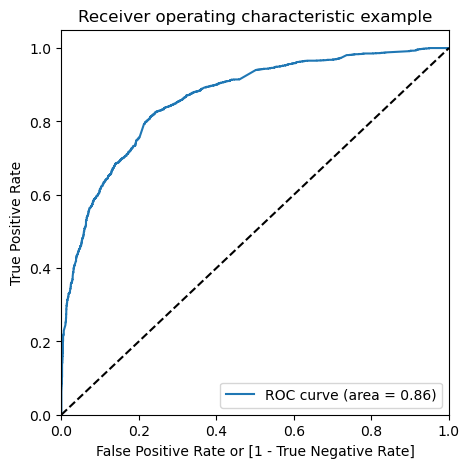

In [546]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [548]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1493,0,0.366327,1493,0,1,1,1,1,0,0,0,0,0,0
6039,0,0.065863,6039,0,1,0,0,0,0,0,0,0,0,0
3226,0,0.377988,3226,0,1,1,1,1,0,0,0,0,0,0
4863,1,0.591719,4863,1,1,1,1,1,1,1,0,0,0,0
9172,1,0.301844,9172,0,1,1,1,1,0,0,0,0,0,0


In [549]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.475865  1.000000  0.000000
0.1   0.1  0.578097  0.985167  0.208514
0.2   0.2  0.686703  0.946411  0.450912
0.3   0.3  0.758197  0.883732  0.644222
0.4   0.4  0.788024  0.826794  0.752824
0.5   0.5  0.773907  0.711005  0.831017
0.6   0.6  0.768898  0.639713  0.886186
0.7   0.7  0.753643  0.566029  0.923979
0.8   0.8  0.712659  0.444976  0.955691
0.9   0.9  0.657104  0.293780  0.986968


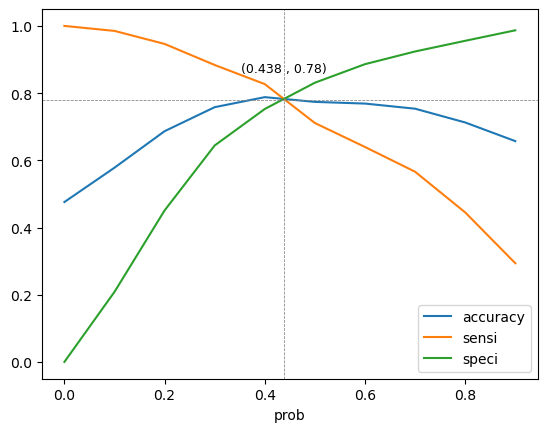

In [550]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [551]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.42 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
1493,0,0.366327,1493,0
6039,0,0.065863,6039,0
3226,0,0.377988,3226,0
4863,1,0.591719,4863,1
9172,1,0.301844,9172,0


### Calculating all metrics using confusion matrix for Train

In [552]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.7898451730418944


In [553]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [554]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1768  534]
 [ 389 1701]] 

************************************************** 

True Negative                    :  1768
True Positive                    :  1701
False Negative                   :  389
False Positve                    :  534
Model Accuracy                   :  0.7898
Model Sensitivity                :  0.8139
Model Specificity                :  0.768
Model Precision                  :  0.7611
Model Recall                     :  0.8139
Model True Positive Rate (TPR)   :  0.8139
Model False Positive Rate (FPR)  :  0.232


************************************************** 



### Precision-recall tradeoff curve

In [556]:
# Creating precision-recall tradeoff curve
from sklearn.metrics import precision_recall_curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

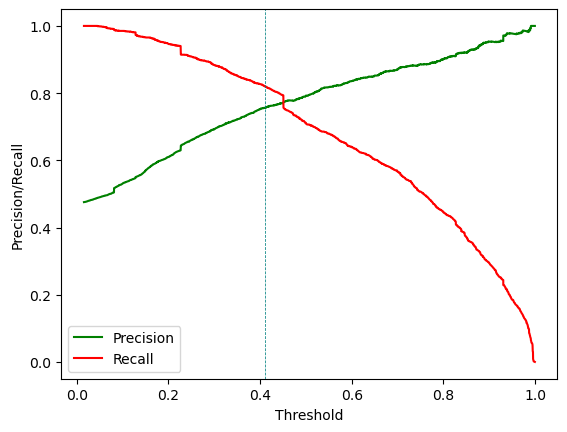

In [557]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. 

It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.42 aprrox from above curve.

In [558]:
# copying df to test model evaluation with precision recall threshold of 0.42
y_train_precision_recall = y_train_pred_final.copy()

In [559]:
# assigning a feature for 0.42 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.42 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
1493,0,0.366327,1493,0,0
6039,0,0.065863,6039,0,0
3226,0,0.377988,3226,0,0
4863,1,0.591719,4863,1,1
9172,1,0.301844,9172,0,0


In [560]:
## Lets see all matrics at 0.42 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[1768  534]
 [ 389 1701]] 

************************************************** 

True Negative                    :  1768
True Positive                    :  1701
False Negative                   :  389
False Positve                    :  534
Model Accuracy                   :  0.7898
Model Sensitivity                :  0.8139
Model Specificity                :  0.768
Model Precision                  :  0.7611
Model Recall                     :  0.8139
Model True Positive Rate (TPR)   :  0.8139
Model False Positive Rate (FPR)  :  0.232


************************************************** 



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.42 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.42. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

In [561]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
1493,0,0.366327,1493,0,37
6039,0,0.065863,6039,0,7
3226,0,0.377988,3226,0,38
4863,1,0.591719,4863,1,59
9172,1,0.301844,9172,0,30


Lead Score: 
    
- Lead Score is assigned to the customers.
- The customers with a higher lead score have a higher conversion chance.
- The customers with a lower lead score have a lower conversion chance.

# Conclusion 

### <strong>Train Data Set:</strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 78 %

- <strong><span style="color:Green">Sensitivity:</span></strong> 81 %

- <strong><span style="color:Green">Specificity:</span></strong> 76 %

### <strong>Test Data Set:</strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 78 %

- <strong><span style="color:Green">Sensitivity:</span></strong> 81 %

- <strong><span style="color:Green">Specificity:</span></strong> 76 %
 

<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

First, sort out the best prospects from the leads you have generated. 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' which contribute most towards the probability of a lead getting converted.

Then, You must keep a list of leads handy so that you can inform them about new courses, services, job offers and future higher studies. Monitor each lead carefully so that you can tailor the information you send to them. Carefully provide job offerings, information or courses that suits best according to the interest of the leads. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects.

Focus on converted leads. Hold question-answer sessions with leads to extract the right information you need about them. Make further inquiries and appointments with the leads to determine their intention and mentality to join online courses.

